[]

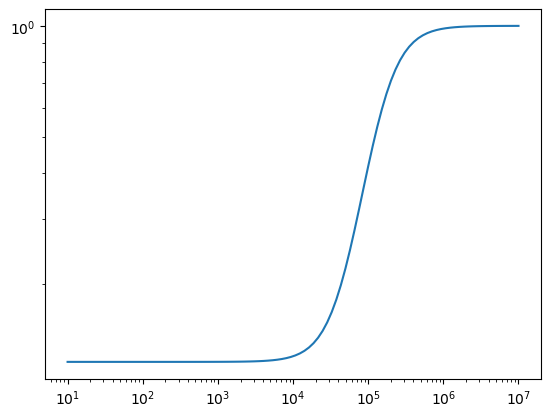

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def Z_tr(f,Rth,Rn,L):
    return (Rth+2*np.pi*1j*f*L+1/)/(Rth+Rn+2*np.pi*f*1j*L+1/)

frq = np.logspace(1,7,100)

plt.plot(frq,Z_tr(frq,4.9e-3,35e-3,45e-9).real)
plt.semilogx()
plt.semilogy()


[]

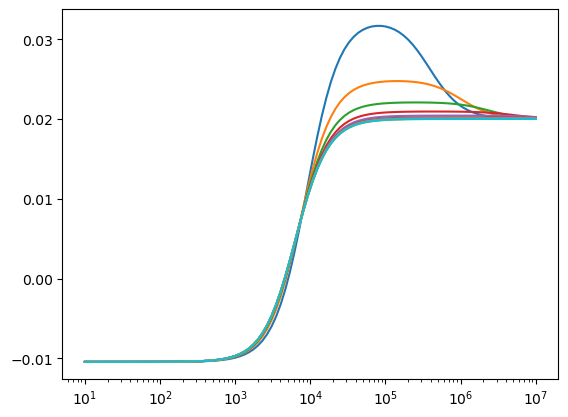

In [12]:
def Z_two_theory(f, Cabs, Ctes, Gabs, alpha, beta):
    Rtes = 10e-3
    Ttes = 0.15
    Pb = 50e-12
    Gtes = 5e-10
    # alpha = 100
    # beta = 1
    # Cabs = 0.8e-12
    # Ctes = 0.03e-12
    # Gabs = 0.3e-6
    lp = (Pb*alpha)/(Gtes*Ttes)
    tau = (Ctes+Cabs-Cabs*(2j*np.pi*f*Cabs/Gabs)/(1+2j*np.pi*f*Cabs/Gabs))/(Gtes*(lp-1))
    Z_inf = Rtes*(1+beta)
    Z_0 = -Rtes * (lp+beta+1)/(lp-1)
    Z_fit = Z_inf +(Z_0 - Z_inf)/(1-2j*np.pi*f*tau)
    return Z_fit 

frq = np.logspace(1,7,100)
Gabs_list = np.logspace(-7,-4,10)
for Gabs in Gabs_list:
    plt.plot(frq,Z_two_theory(frq,0.8e-12, 0.03e-12, Gabs, 100, 1).real)
plt.semilogx()

ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

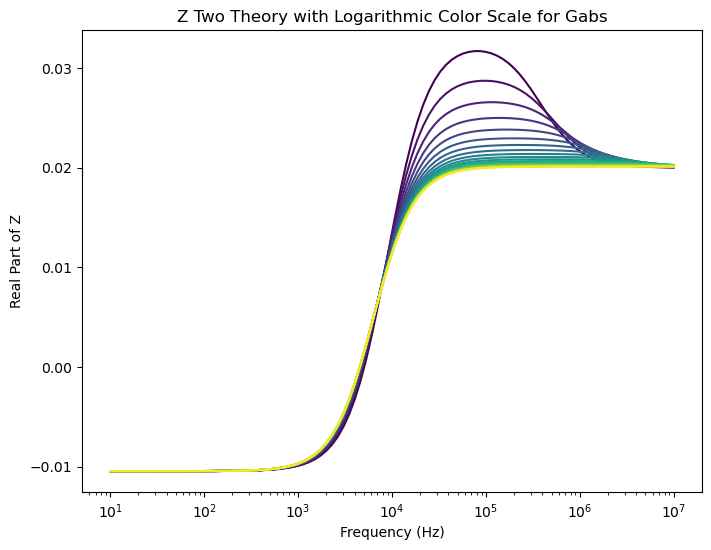

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def Z_two_theory(f, Cabs, Ctes, Gabs, alpha, beta):
    Rtes = 10e-3
    Ttes = 0.15
    Pb = 50e-12
    Gtes = 5e-10
    lp = (Pb*alpha)/(Gtes*Ttes)
    tau = (Ctes + Cabs - Cabs*(2j*np.pi*f*Cabs/Gabs) / (1 + 2j*np.pi*f*Cabs/Gabs)) / (Gtes * (lp - 1))
    Z_inf = Rtes * (1 + beta)
    Z_0 = -Rtes * (lp + beta + 1) / (lp - 1)
    Z_fit = Z_inf + (Z_0 - Z_inf) / (1 - 2j * np.pi * f * tau)
    return Z_fit

frq = np.logspace(1, 7, 100)
Gabs_list = np.logspace(-7, -5, 20)

# カラーマップを作成
cmap = plt.get_cmap('viridis')
norm = LogNorm(vmin=min(Gabs_list), vmax=max(Gabs_list))

plt.figure(figsize=(8, 6))

for Gabs in Gabs_list:
    color = cmap(norm(Gabs))  # Gabsの値に応じて色を設定 (対数スケール)
    plt.plot(frq, Z_two_theory(frq, 0.8e-12, 0.03e-12, Gabs, 100, 1).real, color=color, label=f'Gabs={Gabs:.1e}')

plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Real Part of Z')
plt.title('Z Two Theory with Logarithmic Color Scale for Gabs')
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), label='Gabs (log scale)')
plt.legend()
plt.show()



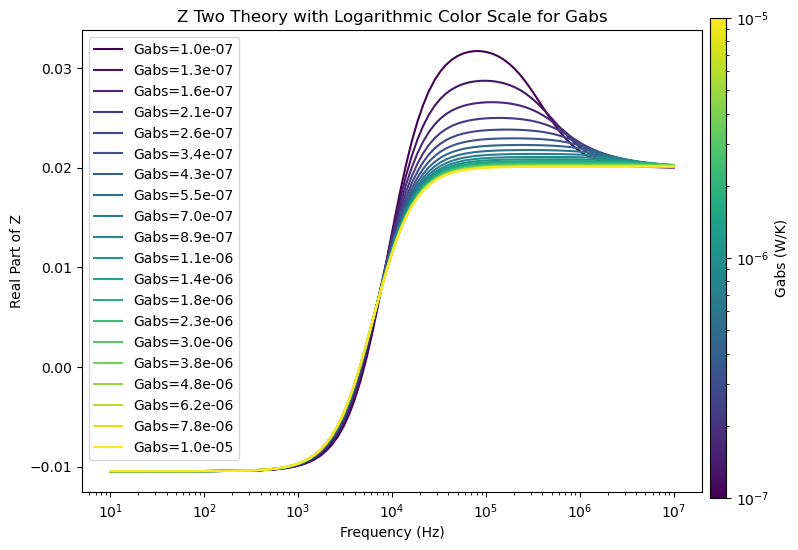

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def Z_two_theory(f, Cabs, Ctes, Gabs, alpha, beta):
    Rtes = 10e-3
    Ttes = 0.15
    Pb = 50e-12
    Gtes = 5e-10
    lp = (Pb*alpha)/(Gtes*Ttes)
    tau = (Ctes + Cabs - Cabs*(2j*np.pi*f*Cabs/Gabs) / (1 + 2j*np.pi*f*Cabs/Gabs)) / (Gtes * (lp - 1))
    Z_inf = Rtes * (1 + beta)
    Z_0 = -Rtes * (lp + beta + 1) / (lp - 1)
    Z_fit = Z_inf + (Z_0 - Z_inf) / (1 - 2j * np.pi * f * tau)
    return Z_fit

frq = np.logspace(1, 7, 100)
Gabs_list = np.logspace(-7, -5, 20)

# カラーマップを作成
cmap = plt.get_cmap('viridis')
norm = LogNorm(vmin=min(Gabs_list), vmax=max(Gabs_list))

fig, ax = plt.subplots(figsize=(8, 6))

for Gabs in Gabs_list:
    color = cmap(norm(Gabs))  # Gabsの値に応じて色を設定 (対数スケール)
    ax.plot(frq, Z_two_theory(frq, 0.8e-12, 0.03e-12, Gabs, 100, 1).real, color=color, label=f'Gabs={Gabs:.1e}')

ax.set_xscale('log')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Real Part of Z')
ax.set_title('Z Two Theory with Logarithmic Color Scale for Gabs')

# 手動でカラーバーを追加
# カラーバー用の新しいAxesを作成
cbar_ax = fig.add_axes([0.91, 0.1, 0.02, 0.8])  # [left, bottom, width, height]
cb = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax)
cb.set_label('Gabs (W/K)')

ax.legend()
plt.show()


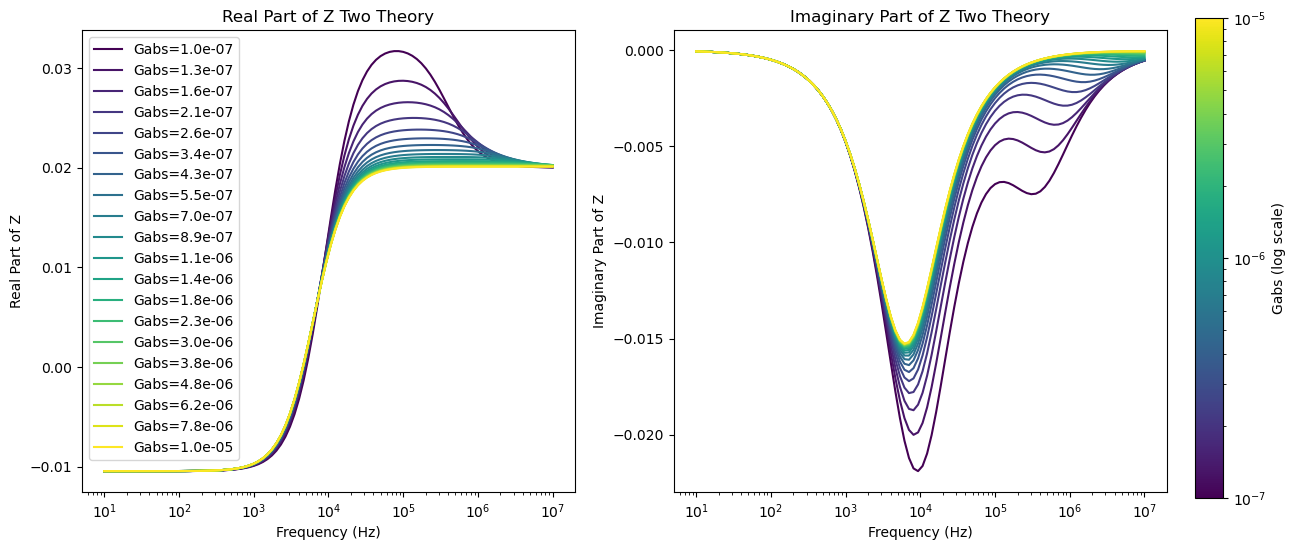

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def Z_two_theory(f, Cabs, Ctes, Gabs, alpha, beta):
    Rtes = 10e-3
    Ttes = 0.15
    Pb = 50e-12
    Gtes = 5e-10
    lp = (Pb*alpha)/(Gtes*Ttes)
    tau = (Ctes + Cabs - Cabs*(2j*np.pi*f*Cabs/Gabs) / (1 + 2j*np.pi*f*Cabs/Gabs)) / (Gtes * (lp - 1))
    Z_inf = Rtes * (1 + beta)
    Z_0 = -Rtes * (lp + beta + 1) / (lp - 1)
    Z_fit = Z_inf + (Z_0 - Z_inf) / (1 - 2j * np.pi * f * tau)
    return Z_fit

frq = np.logspace(1, 7, 100)
Gabs_list = np.logspace(-7, -5, 20)

# カラーマップを作成
cmap = plt.get_cmap('viridis')
norm = LogNorm(vmin=min(Gabs_list), vmax=max(Gabs_list))

fig, (ax_real, ax_imag) = plt.subplots(1, 2, figsize=(14, 6))

# 実数部のプロット
for Gabs in Gabs_list:
    color = cmap(norm(Gabs))  # Gabsの値に応じて色を設定 (対数スケール)
    ax_real.plot(frq, Z_two_theory(frq, 0.8e-12, 0.03e-12, Gabs, 100, 1).real, color=color, label=f'Gabs={Gabs:.1e}')
ax_real.set_xscale('log')
ax_real.set_xlabel('Frequency (Hz)')
ax_real.set_ylabel('Real Part of Z')
ax_real.set_title('Real Part of Z Two Theory')
ax_real.legend()

# 虚数部のプロット
for Gabs in Gabs_list:
    color = cmap(norm(Gabs))  # Gabsの値に応じて色を設定 (対数スケール)
    ax_imag.plot(frq, Z_two_theory(frq, 0.8e-12, 0.03e-12, Gabs, 100, 1).imag, color=color)
ax_imag.set_xscale('log')
ax_imag.set_xlabel('Frequency (Hz)')
ax_imag.set_ylabel('Imaginary Part of Z')
ax_imag.set_title('Imaginary Part of Z Two Theory')

# カラーバーを手動で追加
cbar_ax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  # [left, bottom, width, height]
cb = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax)
cb.set_label('Gabs (log scale)')

plt.show()


/var/folders/hy/hr899s4j6h56lyk5t8z2m3n40000gn/T/ipykernel_38260/4135032838.py:54: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


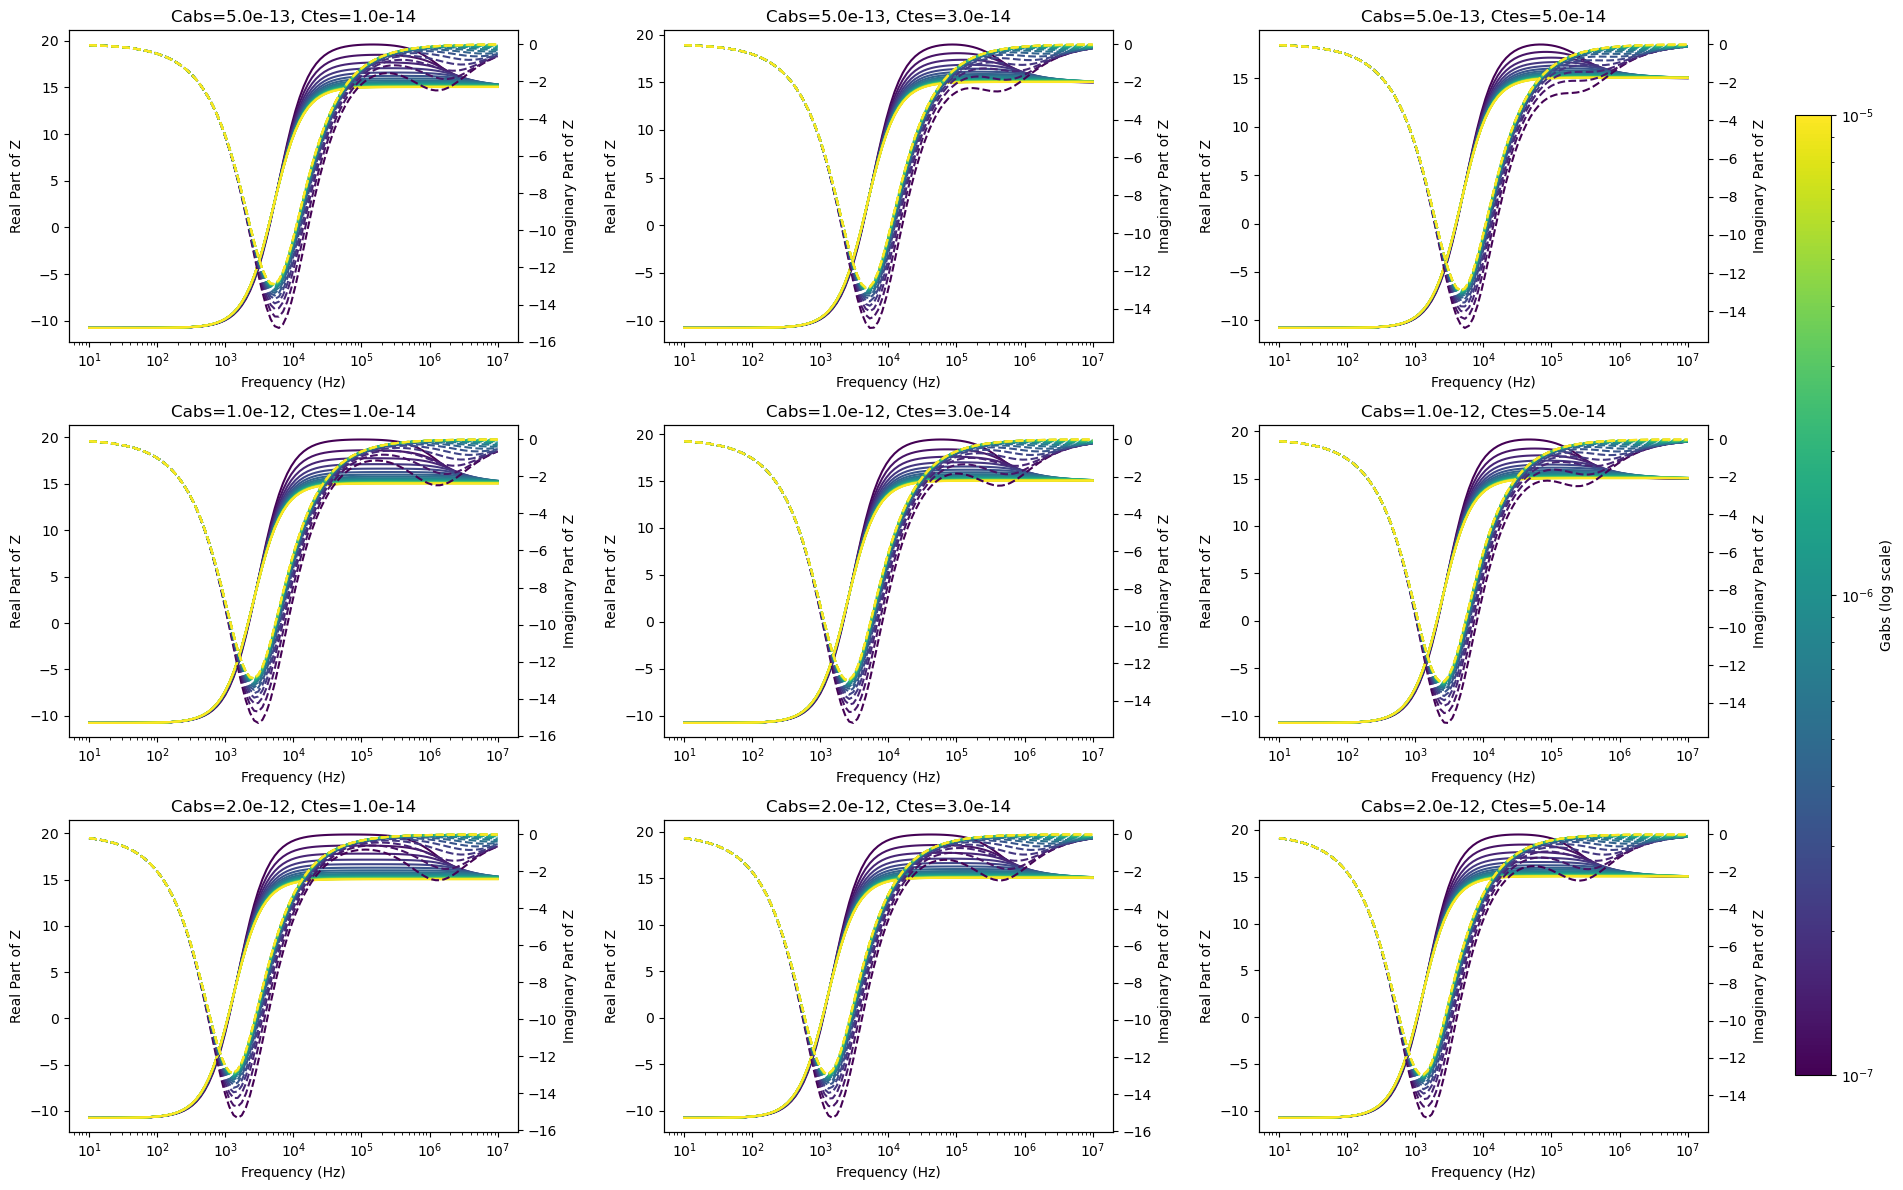

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def Z_two_theory(f, Cabs, Ctes, Gabs, alpha, beta):
    Rtes = 10e-3
    Ttes = 0.15
    Pb = 50e-12
    Gtes = 5e-10
    lp = (Pb*alpha)/(Gtes*Ttes)
    tau = (Ctes + Cabs - Cabs*(2j*np.pi*f*Cabs/Gabs) / (1 + 2j*np.pi*f*Cabs/Gabs)) / (Gtes * (lp - 1))
    Z_inf = Rtes * (1 + beta)
    Z_0 = -Rtes * (lp + beta + 1) / (lp - 1)
    Z_fit = Z_inf + (Z_0 - Z_inf) / (1 - 2j * np.pi * f * tau)
    return Z_fit

# パラメータの設定
frq = np.logspace(1, 7, 100)
Gabs_list = np.logspace(-7, -5, 20)
Cabs_list = [0.5e-12, 1e-12, 2e-12]
Ctes_list = [0.01e-12, 0.03e-12, 0.05e-12]
alpha_list = [50, 100, 150]
beta_list = [0.5, 1, 1.5]

# カラーマップを作成
cmap = plt.get_cmap('viridis')
norm = LogNorm(vmin=min(Gabs_list), vmax=max(Gabs_list))

fig, axes = plt.subplots(len(Cabs_list), len(Ctes_list), figsize=(18, 12))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

for i, Cabs in enumerate(Cabs_list):
    for j, Ctes in enumerate(Ctes_list):
        ax_real = axes[i, j]
        ax_imag = ax_real.twinx()
        
        for Gabs in Gabs_list:
            color = cmap(norm(Gabs))  # Gabsの値に応じて色を設定 (対数スケール)
            ax_real.plot(frq, Z_two_theory(frq, Cabs, Ctes, Gabs, alpha_list[0], beta_list[0]).real*1e+3, color=color)
            ax_imag.plot(frq, Z_two_theory(frq, Cabs, Ctes, Gabs, alpha_list[0], beta_list[0]).imag*1e+3, color=color, linestyle='--')
        
        ax_real.set_xscale('log')
        ax_real.set_xlabel('Frequency (Hz)')
        ax_real.set_ylabel('Real Part of Z')
        ax_real.set_title(f'Cabs={Cabs:.1e}, Ctes={Ctes:.1e}')
        
        ax_imag.set_xscale('log')
        ax_imag.set_ylabel('Imaginary Part of Z')

# カラーバーを手動で追加
cbar_ax = fig.add_axes([1.0, 0.1, 0.02, 0.8])  # [left, bottom, width, height]
cb = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), cax=cbar_ax)
cb.set_label('Gabs (log scale)')
fig.tight_layout()
plt.show()
